In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

In [2]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate

        # 初始化权重矩阵,权重值范围 (0, 1) -> (-1, 1)
        self.wih = -1 + 2 * np.random.rand(self.hnodes, self.inodes)  
        self.who = -1 + 2 * np.random.rand(self.onodes, self.hnodes)

        self.activation_func = lambda x: sc.expit(x) # sigmoid function

        
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin = 2).T # [inodes, 1]
        targets = np.array(targets_list, ndmin = 2).T # [onodes, 1]


        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)

        output_errors = targets - final_outputs # 输出层节点误差, shape: [onodes, 1]
        # 但不是严格意义的按权重分隔误差，假设两个节点简单地用 e1*w1.1 代替 e1 * w1.1/(w1.1+w2.1)， 实验证明这种简单分隔也是有效的
        # 简单处理可以加速计算
        hidden_errors = np.dot(self.who.T, output_errors) # 按照隐藏层到输出层的权重分隔误差。 shape: [hnodes, 1]

        # 单个梯度公式： d E/d W[j,k] = -(t[k]-o[k]) * o[k] * (1-o[k]) * o[j]，其中o[j], o[k]分别代表隐藏层和输出层的输出, t[k]是目标
        # 反向传播，更新权重
        self.who -= -self.lr * np.dot(output_errors * final_outputs * (1 - final_outputs), np.transpose(hidden_outputs))

        self.wih -= -self.lr * np.dot(hidden_errors * hidden_outputs * (1 - hidden_outputs), np.transpose(inputs))

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin = 2).T # [n, 1]

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        return final_outputs


In [3]:
data_file = open('mnist_dataset/mnist_train_100.csv')
data_list = data_file.readlines()

print(data_list[0]) # print 99th line
data_file.close()

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

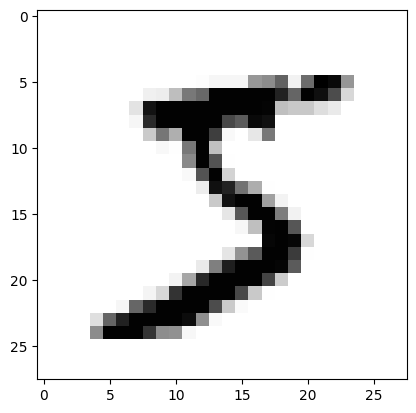

In [4]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28, 28)  # 先转换浮点数组，再转化为28*28二维数组

plt.imshow(image_array, cmap='Greys', interpolation='None')

In [43]:
input_nodes = 784  # 28*28像素
hidden_nodes = 300
output_nodes = 10

learning_rate = 0.1

epoches = 5

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load file
training_data_file = open('mnist_dataset/mnist_train.csv')
training_data_list = training_data_file.readlines()
training_data_file.close()

def normalize(str_arr):
    return np.asfarray(str_arr) / 255.0 * 0.99 + 0.01

for e in range(epoches):
    print('epoch: ', e)
    for index, record in enumerate(training_data_list):
        if index % 10000 == 0:
            print('\ttraining index: ', index)
        values = record.split(',')
        inputs = normalize(values[1:]) # 归一化
        
        targets = np.zeros(output_nodes) + 0.01
        targets[int(values[0])] = 0.99  # values[0]是目标标签，其他位置的值都是0.01
        
        nn.train(inputs, targets)

epoch:  0
	training index:  0
	training index:  10000
	training index:  20000
	training index:  30000
	training index:  40000
	training index:  50000
epoch:  1
	training index:  0
	training index:  10000
	training index:  20000
	training index:  30000
	training index:  40000
	training index:  50000
epoch:  2
	training index:  0
	training index:  10000
	training index:  20000
	training index:  30000
	training index:  40000
	training index:  50000
epoch:  3
	training index:  0
	training index:  10000
	training index:  20000
	training index:  30000
	training index:  40000
	training index:  50000
epoch:  4
	training index:  0
	training index:  10000
	training index:  20000
	training index:  30000
	training index:  40000
	training index:  50000


In [49]:
# 测试模型
test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    values = record.split(',')
    correct_label = int(values[0])
    
    inputs = normalize(values[1:])
    outputs = nn.query(inputs)

    max_label_idx = np.argmax(outputs) # 求最大值所在的索引

    # print('target: {}, network output: {}'.format(correct_label, max_label_idx))
    if max_label_idx == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
# print('\nscore board:', scorecard)
scorecard_arr = np.asarray(scorecard)
print('performances: ', scorecard_arr.sum() / scorecard_arr.size)

performances:  0.9661


## Using our own images to test:

In [132]:
import os
# helper to load data from PNG image files
import imageio.v3

# our own image test data set
our_own_dataset = []

my_own_images_dir = 'my_own_images/'
for label in os.listdir(my_own_images_dir):
    subdir_path = os.path.join(my_own_images_dir, label)
    if os.path.isdir(subdir_path) and not label.startswith('.'):
        for image_file in os.listdir(subdir_path):
            image_file = os.path.join(subdir_path, image_file)
            # load image data from png files into an array
            img_array = imageio.v3.imread(image_file, mode='F') # 模式F 浮点灰色图像

            # reshape from 28x28 to list of 784 values, invert values
            img_data  = 255.0 - img_array.reshape(784) # 一般0代表黑色，255代表白色， 但是MNIST使用了相反的方式
            # then scale data to range from 0.01 to 1.0
            img_data = (img_data / 255.0 * 0.99) + 0.01

            # append label and image data  to test data set
            record = np.append(int(label), img_data)
            print('label: {}, image array size: {}'.format(label, record.size))
            our_own_dataset.append(record)

label: 2, image array size: 785
label: 3, image array size: 785
label: 3, image array size: 785
label: 4, image array size: 785
label: 6, image array size: 785
label: 6, image array size: 785
label: 5, image array size: 785


label:  2


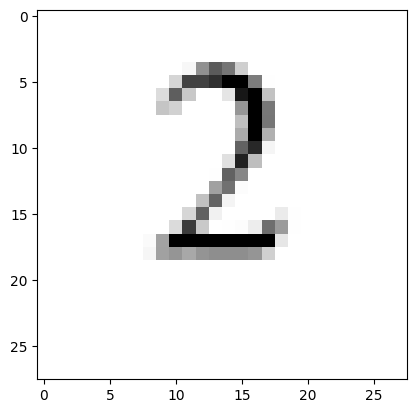

In [134]:
print('label: ', int(our_own_dataset[0][0]))
plt.imshow(our_own_dataset[0][1:].reshape(28,28), cmap='Greys', interpolation='None')

[[2.40676459e-04]
 [2.70553472e-04]
 [9.33681401e-01]
 [5.60698795e-02]
 [3.92843137e-04]
 [1.82724683e-03]
 [2.56502339e-05]
 [1.25158305e-01]
 [1.53289192e-05]
 [9.06189472e-03]]
network says:  2
match!


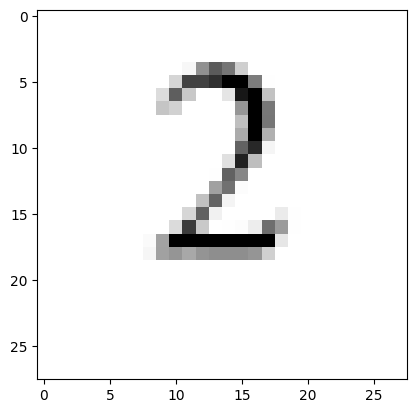

In [146]:
# test the neural network with our own images

# record to test
item = 0

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = nn.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says: ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")